In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('uber.csv')

In [24]:
#df.describe()
#df.head
#df.head
#df
#df.info()

In [49]:
df.shape

(200000, 7)

In [51]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [45]:
df.drop(columns=["Unnamed: 0","key"],inplace=True)

In [57]:
#df["pickup_datetime"].fillna(value=df["pickup_datetime"].mean(),inplace=True)

In [193]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
day                    int32
year                   int32
month                  int32
dayofweek              int32
dtype: object

In [67]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

In [153]:
df=df.assign(day=df.pickup_datetime.dt.day,year=df.pickup_datetime.dt.year, month=df.pickup_datetime.dt.month,dayofweek=df.pickup_datetime.dt.dayofweek)

In [191]:
df=df.drop("pickup_datetime",axis=1)

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
plt.figure(figsize=(3,4))

<Figure size 300x400 with 0 Axes>

<Figure size 300x400 with 0 Axes>

Text(0.5, 1.0, 'FareAmount')

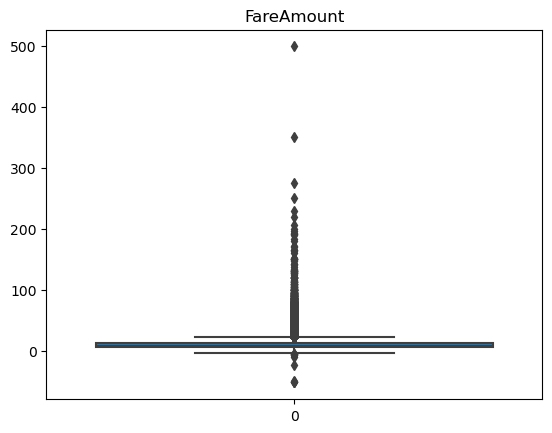

In [92]:
sns.boxplot(df["fare_amount"])
plt.title("FareAmount")

In [96]:
q1=df["fare_amount"].quantile(0.25)
q3=df["fare_amount"].quantile(0.75)
iqr=q3-q1

In [98]:
q1

6.0

In [100]:
q3

12.5

In [102]:
df=df[(df["fare_amount"]>q1-1.5*iqr)&(df["fare_amount"]<q3+1.5*iqr)]

Text(0.5, 1.0, 'FareAmount')

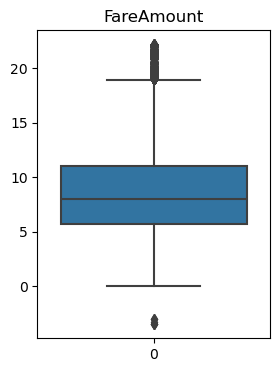

In [121]:
plt.figure(figsize=(3,4))
sns.boxplot(df["fare_amount"])
plt.title("FareAmount")

In [110]:
df.shape

(182833, 8)

In [123]:
#df.corr()

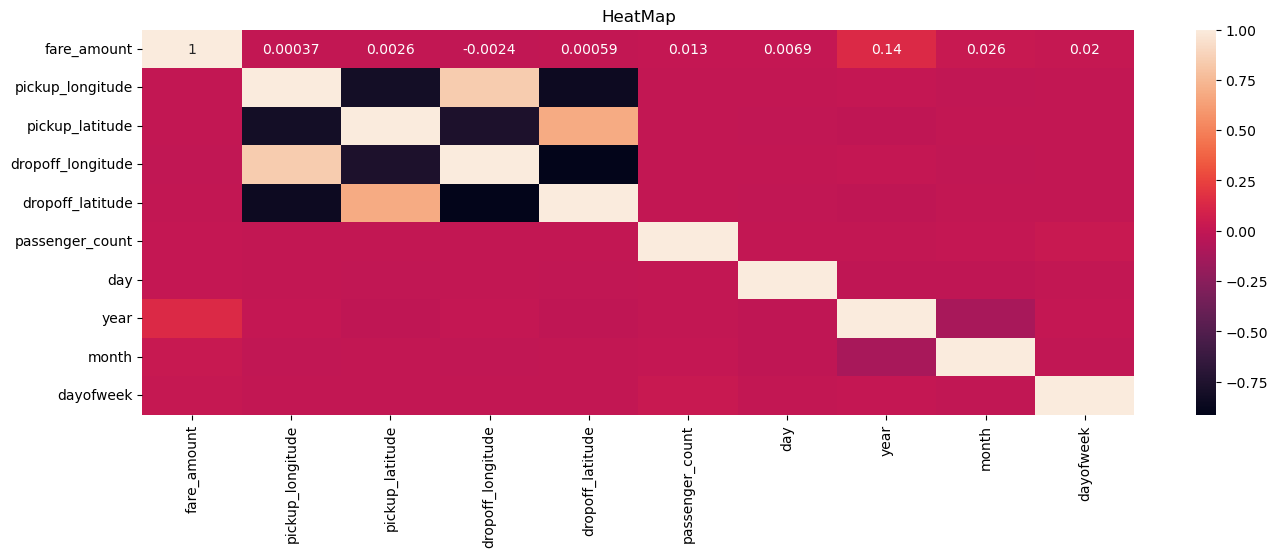

In [268]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title("HeatMap")
plt.show()

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [195]:
x=df.drop("fare_amount",axis=1)

In [197]:
y=df["fare_amount"]

In [199]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [201]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [207]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [208]:
lr

LinearRegression()

In [218]:
from sklearn.metrics import mean_squared_error, r2_score

In [224]:
y_pre=lr.predict(x_test)
r2_lr=r2_score(y_pre,y_test)
mean_lr=np.sqrt(mean_squared_error(y_pre,y_test))

In [232]:
y1_pre=rf.predict(x_test)
r2_rf=r2_score(y1_pre,y_test)
mean_rf=np.sqrt(mean_squared_error(y1_pre,y_test))

In [236]:
r2_lr

-46.3195991216118

In [238]:
r2_rf

0.6352862067601306

In [240]:
mean_lr

4.092476921899316

In [242]:
mean_rf

2.103105803036017

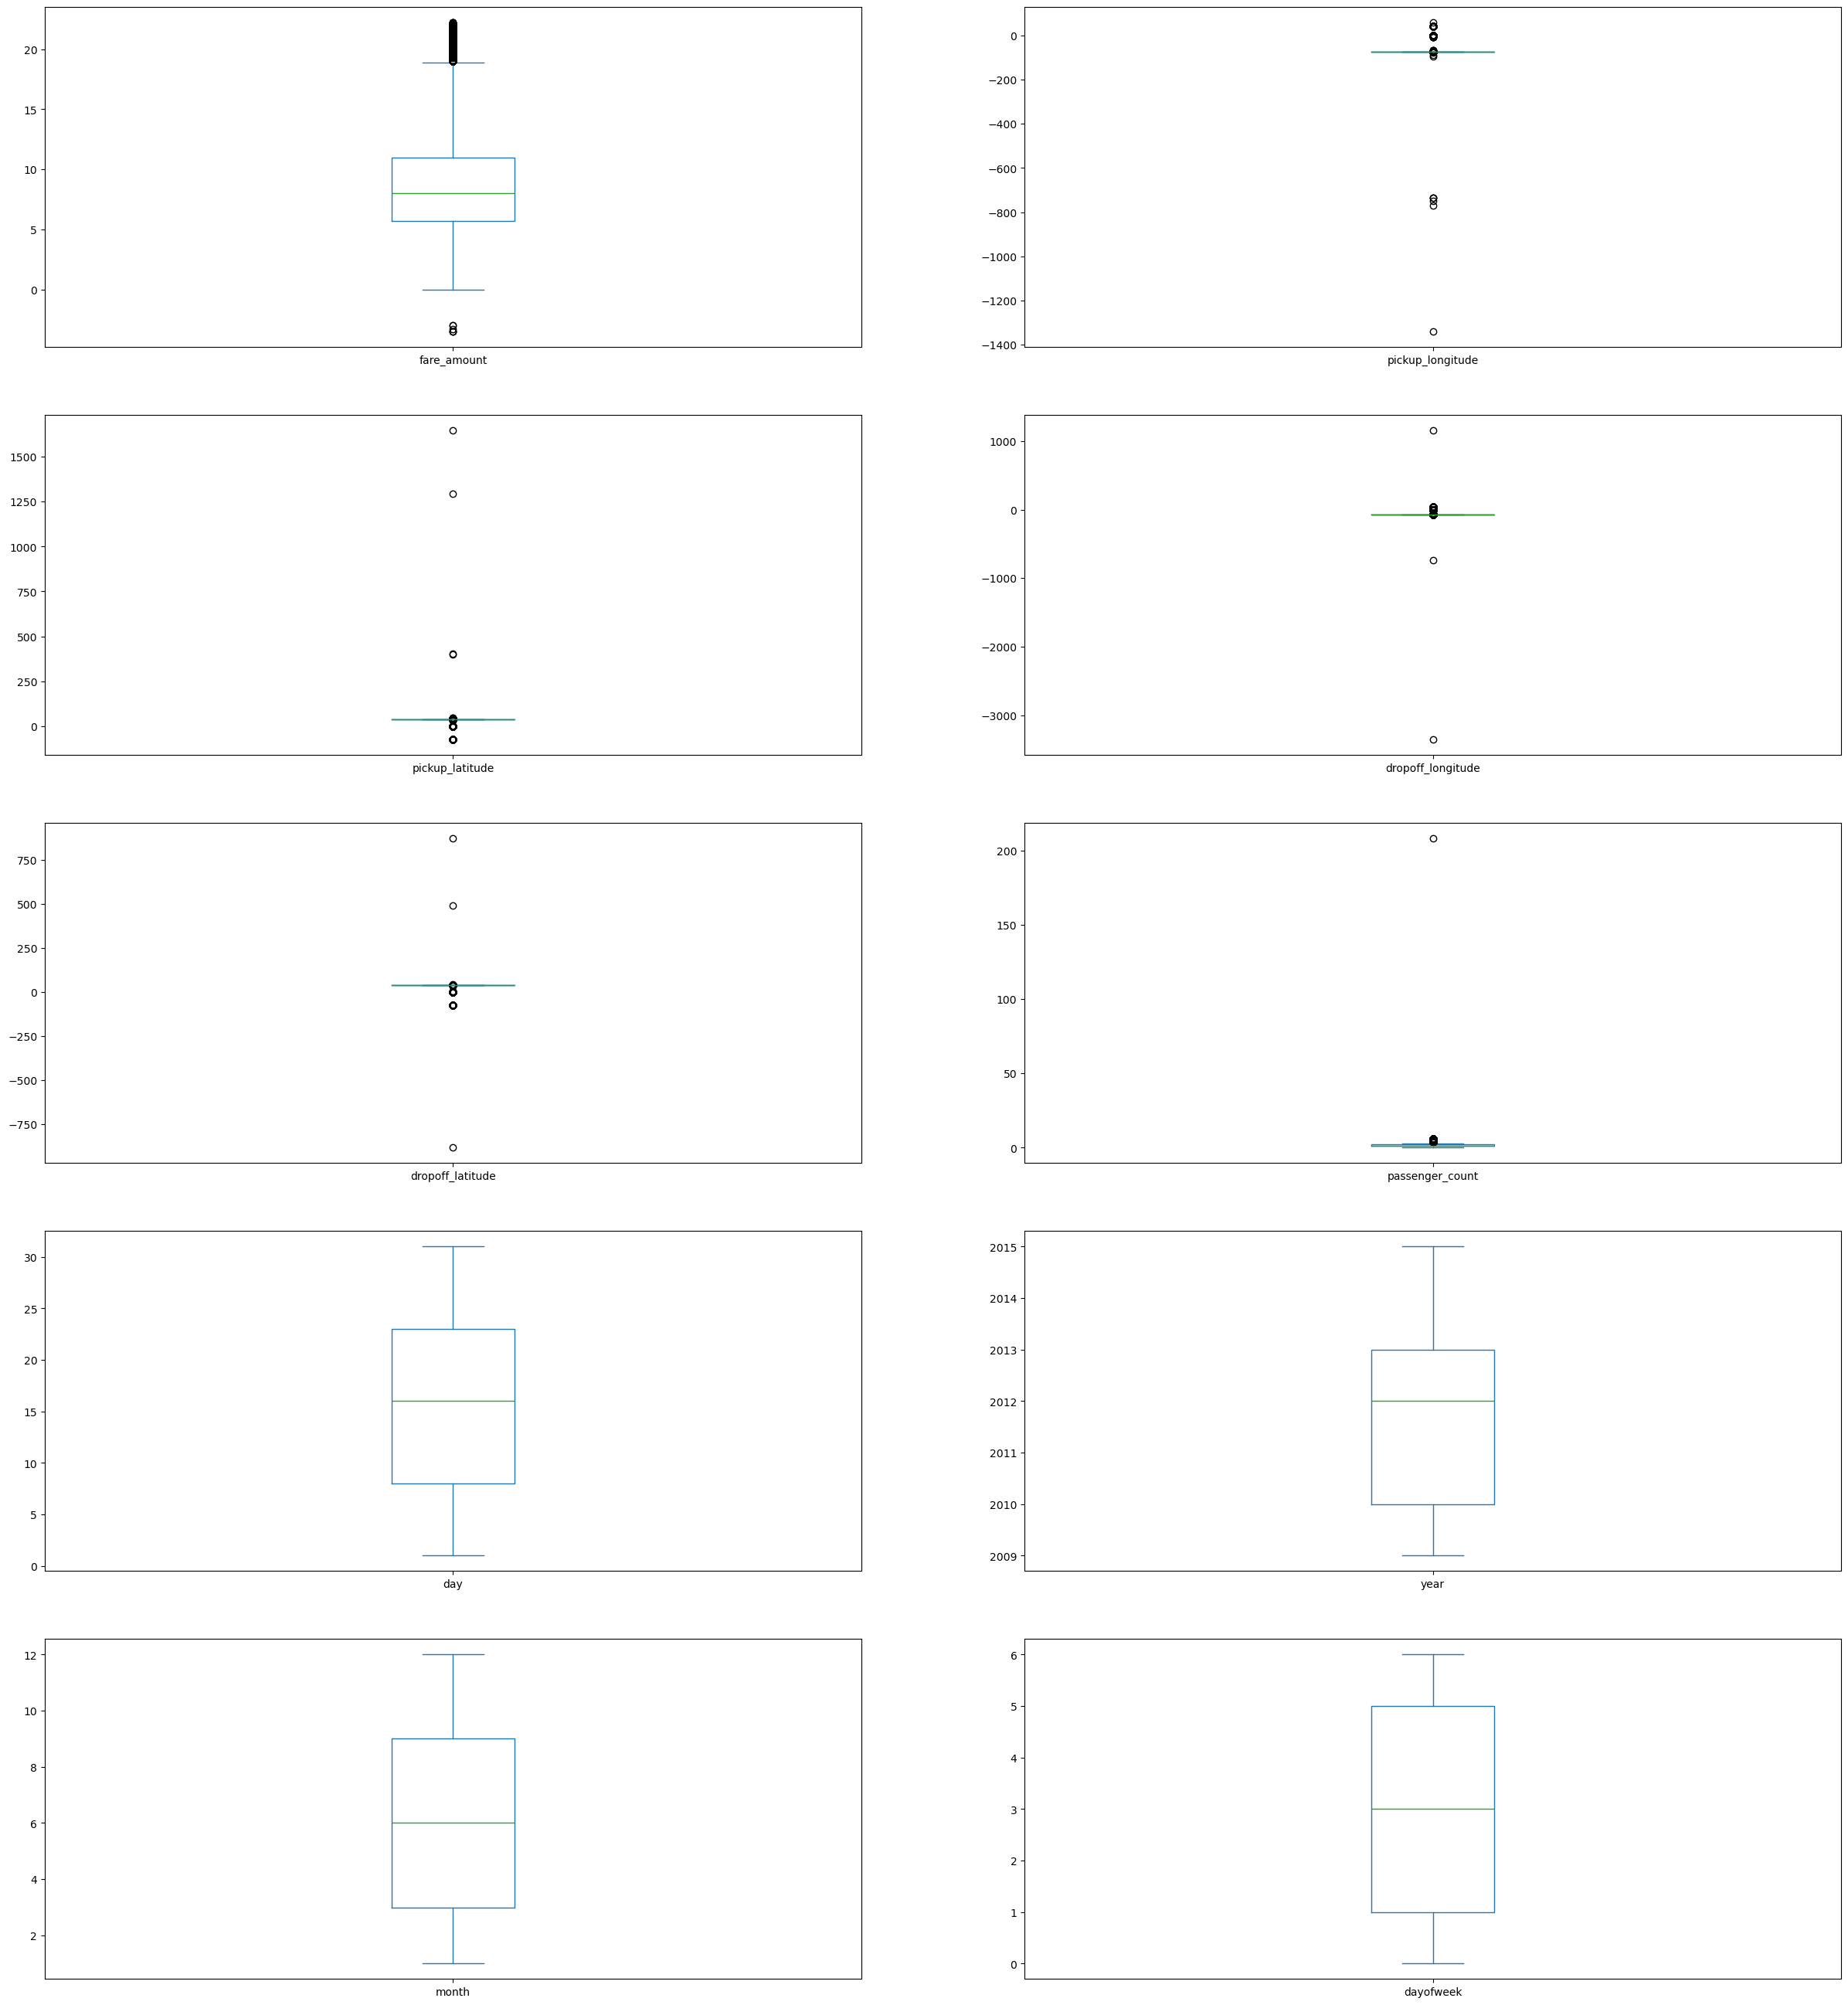

In [256]:
df.plot(subplots=True,kind="box",figsize=(30,40),layout=(6,2))
plt.show()

In [260]:
df.iloc[:4:]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,year,month,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,2015,5,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,2009,7,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,2009,8,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,2009,6,4
